<a href="https://colab.research.google.com/github/mcakyerima/ML-for-beginners/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multivariate Linear Regression with Synthetic Data

In this lesson, we will learn how to perform multivariate linear regression using a synthetic dataset. We will generate the dataset, preprocess it, visualize it, build a linear regression model, and make predictions. Let's get started!

### Importing Necessary Libraries

First, we need to import the necessary libraries.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)


### Generating Synthetic Data

We will generate a synthetic dataset with 100 datapoints. The dataset will have four columns: `area`, `bedrooms`, `age`, and `price`. We will also introduce some null values in the `price` column to demonstrate how to handle missing data.


In [6]:
# Generate synthetic data
area = np.random.randint(500, 5000, 100)
bedrooms = np.random.randint(1, 8, 100)
age = np.random.randint(1, 50, 100)
price = 50000 + (area * 100) + (bedrooms * 20000) - (age * 300) + np.random.randint(-10000, 10000, 100)

# Create a DataFrame
data = {
    'area': area,
    'bedrooms': bedrooms,
    'age': age,
    'price': price
}
df = pd.DataFrame(data)

# Introduce null values into the 'price' column
num_nulls = 10  # Number of null values to introduce
null_indices = np.random.choice(df.index, num_nulls, replace=False)
df.loc[null_indices, 'price'] = np.nan

# Display the first few rows of the DataFrame
df.head()


,area,bedrooms,age,price
0,1360,7,2,328846.0
1,4272,7,44,595218.0
2,3592,2,26,436135.0
3,966,2,32,178296.0
4,4926,4,6,615355.0


In [11]:
# viewing null values in the dataset
df.isnull().sum()


area         0
bedrooms     0
age          0
price       10
dtype: int64

In [12]:
# show the table where there are null values
df[df.isnull().any(axis=1)]

,area,bedrooms,age,price
6,3671,3,4,NaN
26,3505,6,19,NaN
31,4056,6,32,NaN
41,3324,6,28,NaN
53,3573,6,2,NaN
55,3961,4,48,NaN
65,1775,1,16,NaN
76,3068,1,40,NaN
92,2070,4,33,NaN
97,4993,1,48,NaN


### Handling Missing Data

To handle the missing values in the `price` column, we will fill them with the mean price of the dataset.


In [13]:
# Calculate the mean price
mean_price = df['price'].mean()

# Fill null values in the 'price' column with the mean price
df['price'].fillna(mean_price, inplace=True)

# Display the DataFrame after filling null values
df.head()


,area,bedrooms,age,price
0,1360,7,2,328846.0
1,4272,7,44,595218.0
2,3592,2,26,436135.0
3,966,2,32,178296.0
4,4926,4,6,615355.0


In [14]:
# check if the null values are filled
df.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the data better by visualizing it. Let's plot some graphs to visualize the relationships between different features and the target variable (`price`).


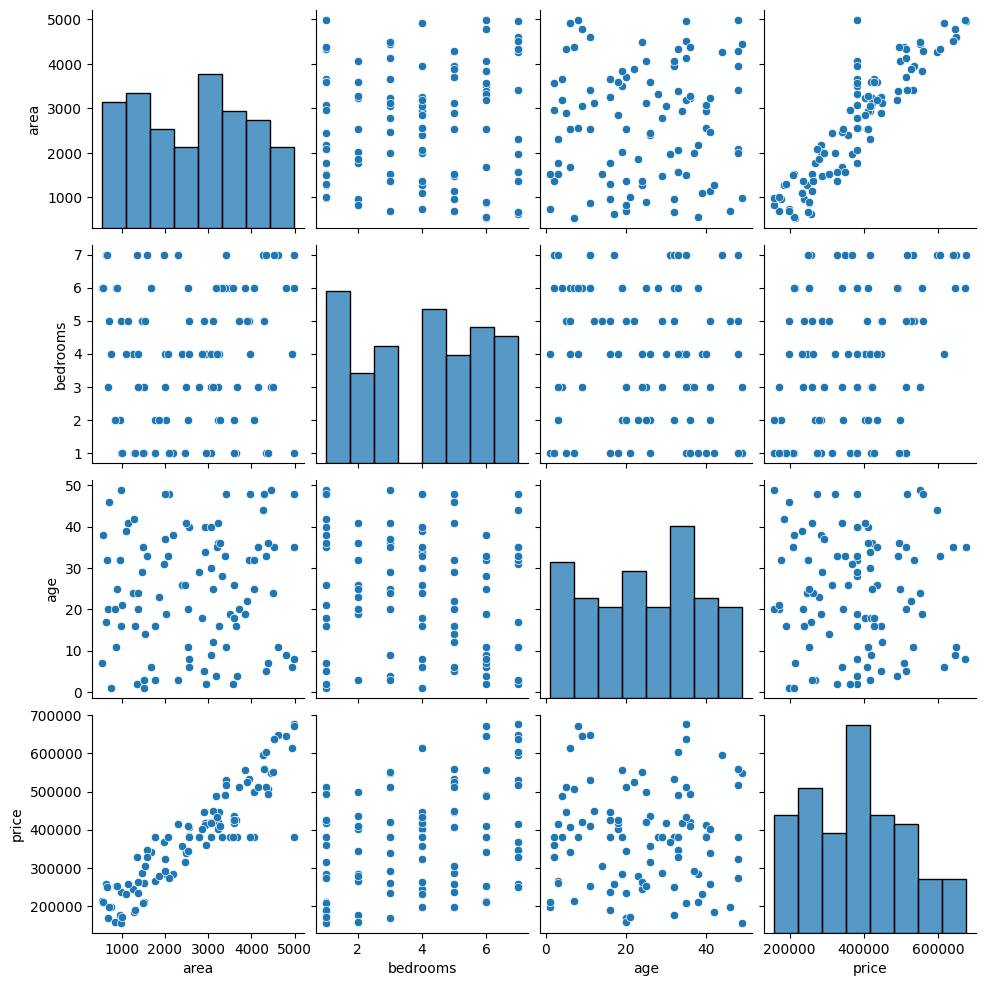

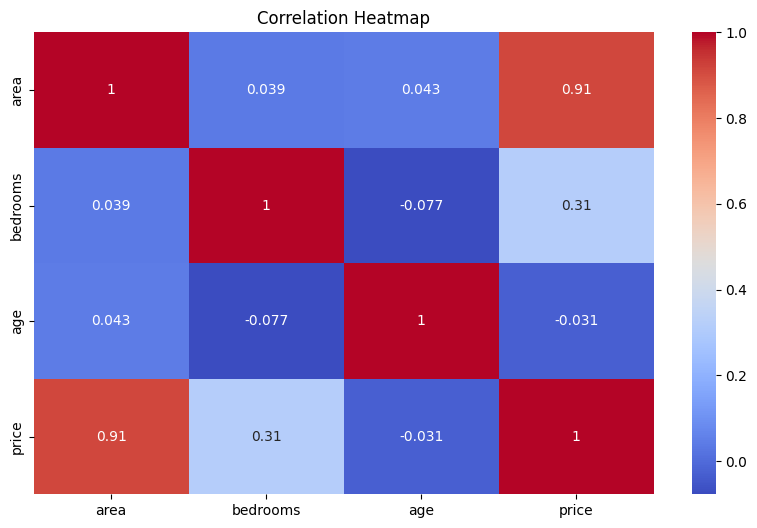

In [26]:
# Plot pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Preparing Data for Linear Regression

We will prepare our data by selecting the features (`area`, `bedrooms`, `age`) and the target variable (`price`). Then, we will split the data into training and test sets.


In [18]:
# Define features (X) and target (y)
X = df[['area', 'bedrooms', 'age']]
y = df['price']

# Split the data into training and test sets (80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building and Training the Linear Regression Model

We will create a linear regression model, fit it to the training data, and display the model's coefficients and intercept.


In [20]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Display the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [   92.97626399 18925.93124889  -596.39820907]
Model Intercept: 74538.10264134698


### Making Predictions

Now, we will use the trained model to make predictions on new data and the test set.


In [21]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("First few predictions:", np.round(y_pred[:5], 2))


First few predictions: [372308.41 519105.08 534744.69 416485.34 372438.33]


### Evaluating the Model

We will evaluate the model's performance by calculating the Mean Absolute Error (MAE) and the R-squared score.


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error (MAE): 23870.435100984992
R-squared Score: 0.7541939063581933


### Visualizing Predictions vs Actual Values

We will plot the predicted prices against the actual prices to see how well our model is performing.


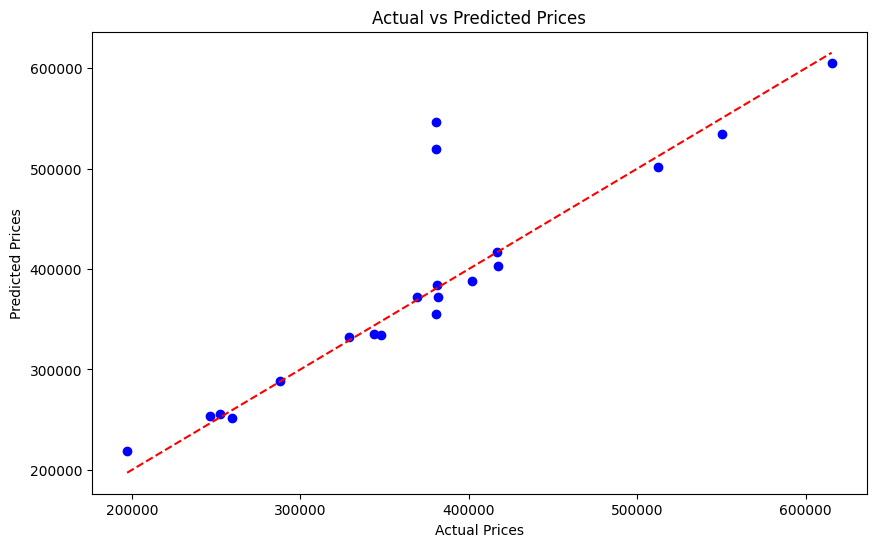

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


### Making Predictions on New Data

Finally, we will make predictions on some new data points.


In [25]:
# Create a new DataFrame for prediction
new_data = pd.DataFrame({'area': [3000, 1000], 'bedrooms': [3, 10], 'age': [4, 16]})

# Make predictions using the model
predictions = model.predict(new_data)

# Display the predictions
print("Predicted Prices:", np.round(predictions, 2))


Predicted Prices: [407859.1  347231.31]


### 1. Correlation Heatmap

**Correlation Heatmap:**
A correlation heatmap visualizes the relationship between different features in your dataset. Each cell in the heatmap shows the correlation coefficient between two features. The correlation coefficient ranges from -1 to 1:

- **1** means a perfect positive correlation (as one feature increases, the other feature increases proportionally).
- **-1** means a perfect negative correlation (as one feature increases, the other feature decreases proportionally).
- **0** means no correlation (no predictable relationship between the features).

**Interpretation of Correlation Heatmap:**
1. **Positive Correlation**: If two features are positively correlated, they tend to increase or decrease together. For example, if `area` and `price` have a high positive correlation, it means that as the `area` of a house increases, its `price` tends to increase as well.
   
2. **Negative Correlation**: If two features are negatively correlated, as one feature increases, the other decreases. For example, if `age` and `price` have a negative correlation, it might suggest that older houses tend to have lower prices.

3. **Correlation Matrix**: Diagonal cells are always 1 because each feature is perfectly correlated with itself. The values off the diagonal show how each pair of features is correlated.

### 2. Coefficients and Intercepts

**Coefficients:**
- **Definition**: In a linear regression model, coefficients represent the relationship between each feature and the target variable. Specifically, they indicate how much the target variable (e.g., price) changes with a one-unit change in the feature.
- **Interpretation**: If a feature has a high coefficient, it has a strong influence on the target variable. For example, if the coefficient for `area` is 112.06, it means that for each additional unit of area, the price increases by approximately 112.06 units, assuming other features remain constant.

**Intercept:**
- **Definition**: The intercept is the value of the target variable when all feature values are zero. It is where the regression line crosses the y-axis.
- **Interpretation**: The intercept provides the baseline value of the target variable before considering the effect of any features.

**Why We Need Them:**
- **Coefficients**: They help us understand the impact of each feature on the target variable. By analyzing coefficients, we can assess which features are the most significant predictors of the target variable.
- **Intercept**: It provides a starting point for the regression model and helps in understanding the base value of the target variable.

### 3. Mean Absolute Error (MAE) and R-squared Score

**Mean Absolute Error (MAE):**
- **Definition**: MAE measures the average magnitude of errors in predictions. It is the average of the absolute differences between the actual values and the predicted values.
- **Calculation**: \[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
\]
where \( y_i \) is the actual value and \( \hat{y_i} \) is the predicted value.

- **Interpretation**: An MAE of 23,870.44 means that, on average, the predicted prices are off by about 23,870.44 Naira from the actual prices. Lower MAE values indicate better model performance.

**R-squared Score:**
- **Definition**: R-squared (R²) represents the proportion of the variance in the target variable that is predictable from the features. It ranges from 0 to 1:
  - **1**: The model perfectly predicts the target variable.
  - **0**: The model does not improve upon the mean value of the target variable.

- **Calculation**: \[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]
where \( \bar{y} \) is the mean of the actual values.

- **Interpretation**: An R-squared value of 0.754 means that approximately 75.4% of the variance in house prices can be explained by the features in the model. This indicates a good fit, though some variance remains unexplained.

### Summary

- **Correlation Heatmap**: Shows relationships between features; helps identify important features and interactions.
- **Coefficients**: Indicate the impact of each feature on the target variable.
- **Intercept**: Provides the baseline value of the target variable.
- **MAE**: Measures the average prediction error; lower values indicate better performance.
- **R-squared**: Indicates how well the model explains the variance in the target variable; higher values indicate a better fit.

There are several strategies you can use to potentially lower the Mean Absolute Error (MAE) in your regression model. Here are some common methods:

### 1. **Feature Engineering**

- **Add More Features**: Including additional relevant features can provide more information to the model. For instance, if you have data about the neighborhood or property condition, adding these features might improve model performance.

- **Feature Transformation**: Transforming features (e.g., applying logarithms or polynomials) can sometimes help capture non-linear relationships. For example, you might try polynomial features or log transformations.

- **Feature Scaling**: Normalize or standardize your features, especially if they have different scales. This can help improve the convergence of the model.

### 2. **Handling Outliers**

- **Detect and Remove Outliers**: Outliers can significantly impact the performance of regression models. Use statistical methods (e.g., Z-score or IQR) to detect and handle outliers.

- **Robust Scaling**: Instead of standard scaling, use robust scaling methods that are less sensitive to outliers.

### 3. **Data Quality**

- **Handle Missing Values**: Ensure that missing values are handled appropriately. Imputing with the median or mean is common, but more sophisticated methods (e.g., KNN imputation) can be used.

- **Ensure Accurate Data**: Check for errors or inconsistencies in the data and correct them. Better data quality generally leads to better model performance.

### 4. **Model Complexity**

- **Use More Complex Models**: Linear regression is quite basic. You can try more complex models such as polynomial regression, decision trees, random forests, or gradient boosting machines.

- **Regularization**: Use regularization techniques like Ridge (L2) or Lasso (L1) to prevent overfitting, especially if you have a large number of features.

### 5. **Cross-Validation**

- **Perform Cross-Validation**: Ensure that the model is not overfitting by using cross-validation. This technique splits the data into multiple subsets and trains the model on different subsets to evaluate its performance more robustly.

### 6. **Hyperparameter Tuning**

- **Optimize Hyperparameters**: If you use more complex models, tuning hyperparameters can significantly impact performance. Techniques like Grid Search or Random Search can be used to find the optimal settings.

### 7. **Increase Training Data**

- **Collect More Data**: Increasing the amount of training data can help the model learn better. More data usually leads to better generalization.

### Example Adjustments to the Provided Code

Here's how you might implement some of these strategies with the existing dataset:

#### Feature Engineering Example

```python
# Example of adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the new feature matrix into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
print("Updated Mean Absolute Error (MAE):", mae)
```

#### Handling Outliers Example

```python
# Detect and remove outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))
df_clean = df[~outlier_condition]

# Prepare new data
X_clean = df_clean[['area', 'bedrooms', 'age']]
y_clean = df_clean['price']

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) after removing outliers:", mae)
```

These adjustments can help bring a MAE down, pleae try them and share your result in the group for review